In [59]:
# Helper Functions
def identifyColumnsWithNANValues(DataFrame):
    '''
    Returns a list of the names of columns from a Pandas DataFrame with NaN Values
    Parameters:
    column_names: List or Array of the column names from DataFrame
    DataFrame: Pandas DataFrame
    '''
    column_names = np.array(DataFrame.columns)
    naColumns = {}
    for column in column_names:
        if DataFrame[column].isna().sum() != 0:
            naColumns[column] = DataFrame[column].isna().sum()
    return naColumns

# Importing Packages

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Reading in the training data from a CSV into a Pandas DataFrame

In [61]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning

## Using the helper function defined above to identify columns with NaN Values

In [62]:
naColumns = identifyColumnsWithNANValues(df)
naColumns

{'Age': 177, 'Cabin': 687, 'Embarked': 2}

## Dealing with NaN/Null Values

### Dealing with NaN/Null Values in the Ages column

In [65]:
print("Number of NaN/Null Values in the Age column is {}".format(naColumns["Age"]))

Number of NaN/Null Values in the Age column is 177


#### Setting the NaN/Null Values to the mean age of the column

In [66]:
setting_nan_values_to_mean_ages = df["Age"].copy()
setting_nan_values_to_mean_ages[setting_nan_values_to_mean_ages.isna()] = setting_nan_values_to_mean_ages.mean()

#### Dropping the NaN/Null Values from the ages

In [67]:
dropping_nan_values_from_ages = df["Age"].copy()
print(dropping_nan_values_from_ages.isna().sum())
dropping_nan_values_from_ages.dropna(inplace = True)
print(dropping_nan_values_from_ages.isna().sum())

177
0


#### Comparing the distribution of the ages from the two cases given above

From the histogram plotted below, it is evident that the better option is to eliminate the data entries corresponding to NaN/Null Values in the Age Column

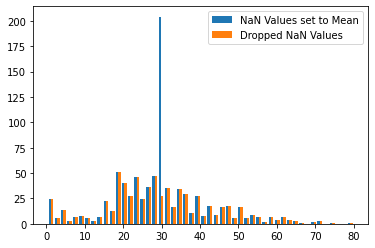

In [68]:
plt.hist([setting_nan_values_to_mean_ages, dropping_nan_values_from_ages], bins = 50, label = ["NaN Values set to Mean", "Dropped NaN Values"])
plt.legend()

In [69]:
df.dropna(subset = ["Age"], inplace = True)
df["Age"].isna().sum()

0

### Dealing with NaN/Null Values in the Cabin Column

In [70]:
print("Number of NaN/Null Values in the Cabin column is {}".format(naColumns["Cabin"]))

Number of NaN/Null Values in the Cabin column is 687


Since the Cabin column has 687 rows of NaN/Null Values and our complete training data has only 715 rows, it will not be useful to include the Cabin column in our analysis

In [71]:
df.drop(columns = "Cabin", inplace = True)

### Dealing with NaN/Null Values in the Embarked Column

In [72]:
df[df["Embarked"].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Since there are only two rows where the Embarked Column has NaN Values, we can safely these two rows.

In [73]:
df.dropna(subset = ["Embarked"], inplace = True)

In [75]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Dealing with Categorical Data

- In our training data, the features "Sex", "Embarked" and "Pclass" are categorical features.
- For the feature "Sex", we split it into one-hot encoded features "sex_male" and "sex_female" and combine one of these into our training data

In [76]:
sex_male = pd.get_dummies(df["Sex"])["male"]
df["sex_male"] = sex_male
#df.drop(columns = "Sex", inplace = True)

In [77]:
Pclass_one_hot = pd.get_dummies(df["Pclass"])
Pclass_one_hot.rename(columns = {1: "Pclass_1", 2: "Pclass_2", 3: "Pclass_3"}, inplace = True)
df["Pclass_1"] = Pclass_one_hot["Pclass_1"]
df["Pclass_2"] = Pclass_one_hot["Pclass_2"]
df["Pclass_3"] = Pclass_one_hot["Pclass_3"]
#df.drop(columns = "Pclass", inplace = True)

In [78]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1,0,0


## Renaming Columns
- The column "SibSp" indicates the number of Sibilings and Spouses the person has on board with them. It is therefore renamed to "Sibilings/Spouse"
- The column "Parch" indicated the number of Parants and Children the person has on board with them. It is therefore renamed to "Parents/Children"

In [79]:
df.rename(columns = {"SibSp": "Sibilings/Spouse", "Parch": "Parents/Children"}, inplace = True)

In [80]:
Embarked_full = []
for place in df["Embarked"].values:
    if place == "S":
        place = "Southampton"
        Embarked_full.append(place)
    elif place == "C":
        place = "Cherbourg"
        Embarked_full.append(place)
    else:
        place = "Queenstown"
        Embarked_full.append(place)
        
df["Embarked_full"] = Embarked_full

# Data Analysis

In [95]:
# Making two smaller DataFrames - One with only categorical variables and the other with only numerical variables

df_categorical = df[["Survived", "Embarked", "Sex", "Pclass"]]
df_numeric = df[["Age", "Sibilings/Spouse", "Parents/Children", "Fare"]]

## Analysing the Numerical Data
- First, we plot histograms for each of the numerical features to see how they are distributed
    - We see that the Age is nearly normally distributed while the others are not.
    - We will have to normalize the Fare data so it is appropiate for the model

(array([ 54.,  46., 177., 169., 117.,  70.,  45.,  23.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

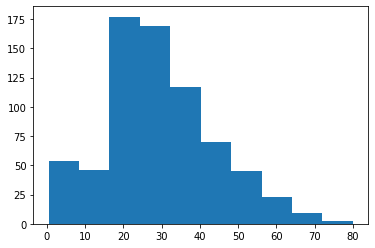

In [88]:
plt.hist(df_numeric["Age"])

(array([469.,   0., 183.,   0.,  25.,   0.,  12.,   0.,  18.,   5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

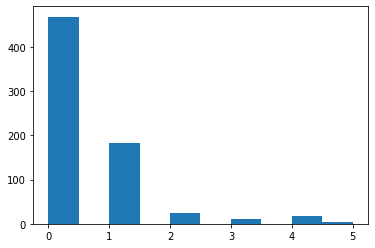

In [89]:
plt.hist(df_numeric["Sibilings/Spouse"])

(array([519., 110.,   0.,  68.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

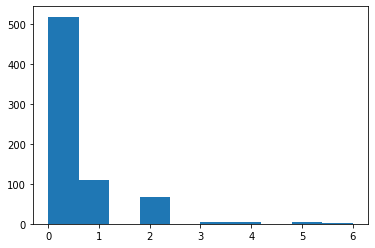

In [90]:
plt.hist(df_numeric["Parents/Children"])

(array([577.,  87.,  28.,   2.,   9.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

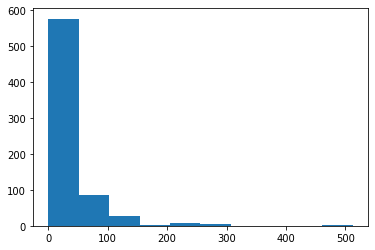

In [91]:
plt.hist(df_numeric["Fare"])

- Here we find the correlation between each of the numerical features and using the heatmap() function from seaborn we can plot a heat map.

Correlaion between the numerical variables: 
                       Age  Sibilings/Spouse  Parents/Children      Fare
Age               1.000000         -0.307351         -0.187896  0.093143
Sibilings/Spouse -0.307351          1.000000          0.383338  0.139860
Parents/Children -0.187896          0.383338          1.000000  0.206624
Fare              0.093143          0.139860          0.206624  1.000000


<AxesSubplot:>

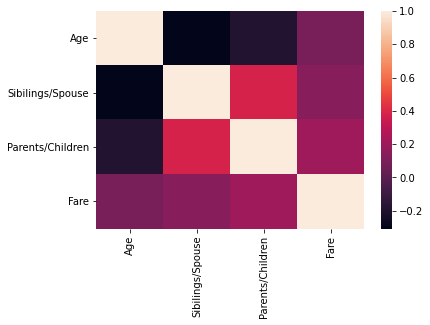

In [97]:
correlation_matrix = df_numeric.corr()
print("Correlaion between the numerical variables: ")
print(correlation_matrix)
sns.heatmap(correlation_matrix)

## Analysing the Categorical Data

Text(0.5, 0, 'Survived')

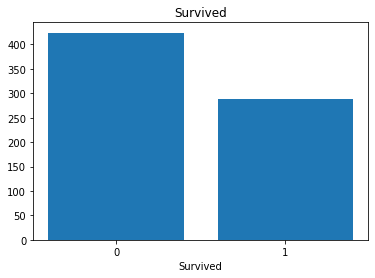

In [117]:
bars = np.array(df_categorical["Survived"].value_counts().index)
plt.bar(x = np.array(df_categorical["Survived"].value_counts().index), height = df_categorical["Survived"].value_counts().values)
plt.title("Survived")
plt.xticks(bars)
plt.xlabel("Survived")